In [1]:
# Data and OS
import os
import numpy as np
from PIL import Image
from tqdm import tqdm

# Visualization
import matplotlib.pyplot as plt

# PyTorch
import torch
torch.backends.cudnn.benchmark = True
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms

# For reproducibility
import random
import copy

import time
import torch.optim as optim
from torch.optim import lr_scheduler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
# Constants
IMAGE_SIZE = 200  # Standard size for all images

class AnimalDataset(Dataset):
    def __init__(self, root_dir, image_size=(IMAGE_SIZE, IMAGE_SIZE), transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.class_names = sorted([d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))])
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(self.class_names)}
        for cls_name in self.class_names:
            cls_folder = os.path.join(root_dir, cls_name)
            for fname in os.listdir(cls_folder):
                if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                    self.image_paths.append(os.path.join(cls_folder, fname))
                    self.labels.append(self.class_to_idx[cls_name])
        self.image_size = image_size

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert('RGB')
        image = image.resize(self.image_size)
        if self.transform:
            image = self.transform(image)
        return image, label

# Define transforms (augmentation + normalization)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Set your dataset path here
# Set your dataset path here
root_dir = "../animals10" 

# Create dataset
dataset = AnimalDataset(root_dir, image_size=(IMAGE_SIZE, IMAGE_SIZE), transform=transform)

# Split into train/val/test
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=0, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=0, pin_memory=True)

Using device: cuda:0
Starting training...
Epoch 1/10
----------


train batches: 100%|██████████| 328/328 [20:10<00:00,  3.69s/it]


train Loss: 1.5131 Acc: 0.4748


val batches: 100%|██████████| 41/41 [00:42<00:00,  1.04s/it]


val Loss: 1.3325 Acc: 0.5499

Epoch 2/10
----------


train batches: 100%|██████████| 328/328 [33:58<00:00,  6.22s/it]


train Loss: 1.1286 Acc: 0.6102


val batches: 100%|██████████| 41/41 [01:22<00:00,  2.01s/it]


val Loss: 1.1577 Acc: 0.6083

Epoch 3/10
----------


train batches: 100%|██████████| 328/328 [35:04<00:00,  6.42s/it]


train Loss: 0.9017 Acc: 0.6886


val batches: 100%|██████████| 41/41 [01:09<00:00,  1.71s/it]


val Loss: 1.0707 Acc: 0.6454

Epoch 4/10
----------


train batches: 100%|██████████| 328/328 [32:05<00:00,  5.87s/it]


train Loss: 0.7266 Acc: 0.7506


val batches: 100%|██████████| 41/41 [01:04<00:00,  1.58s/it]


val Loss: 1.0171 Acc: 0.6699

Epoch 5/10
----------


train batches: 100%|██████████| 328/328 [37:48<00:00,  6.91s/it]


train Loss: 0.5594 Acc: 0.8104


val batches: 100%|██████████| 41/41 [01:20<00:00,  1.97s/it]


val Loss: 1.1704 Acc: 0.6385

Epoch 6/10
----------


train batches: 100%|██████████| 328/328 [37:48<00:00,  6.92s/it]


train Loss: 0.4082 Acc: 0.8651


val batches: 100%|██████████| 41/41 [01:20<00:00,  1.97s/it]


val Loss: 0.8632 Acc: 0.7245

Epoch 7/10
----------


train batches: 100%|██████████| 328/328 [36:12<00:00,  6.62s/it]


train Loss: 0.3030 Acc: 0.9007


val batches: 100%|██████████| 41/41 [01:12<00:00,  1.77s/it]


val Loss: 1.0335 Acc: 0.6985

Epoch 8/10
----------


train batches: 100%|██████████| 328/328 [33:29<00:00,  6.13s/it]


train Loss: 0.2203 Acc: 0.9287


val batches: 100%|██████████| 41/41 [01:04<00:00,  1.57s/it]


val Loss: 0.9167 Acc: 0.7344

Epoch 9/10
----------


train batches: 100%|██████████| 328/328 [35:28<00:00,  6.49s/it]


train Loss: 0.1770 Acc: 0.9422


val batches: 100%|██████████| 41/41 [01:19<00:00,  1.95s/it]


val Loss: 0.9495 Acc: 0.7356

Epoch 10/10
----------


train batches: 100%|██████████| 328/328 [33:22<00:00,  6.11s/it]


train Loss: 0.1483 Acc: 0.9525


val batches: 100%|██████████| 41/41 [01:01<00:00,  1.49s/it]


val Loss: 1.0044 Acc: 0.7256

Training complete in 347m 8s
Best val Acc: 0.7356


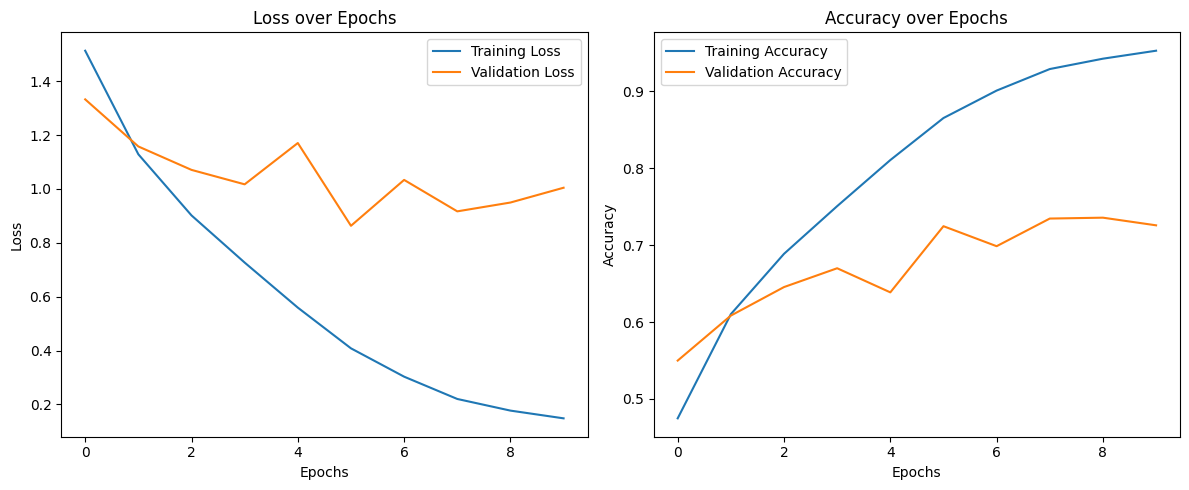

Evaluating model on test set...


Testing: 100%|██████████| 41/41 [01:17<00:00,  1.90s/it]


Test Loss: 0.9785 Acc: 0.7220


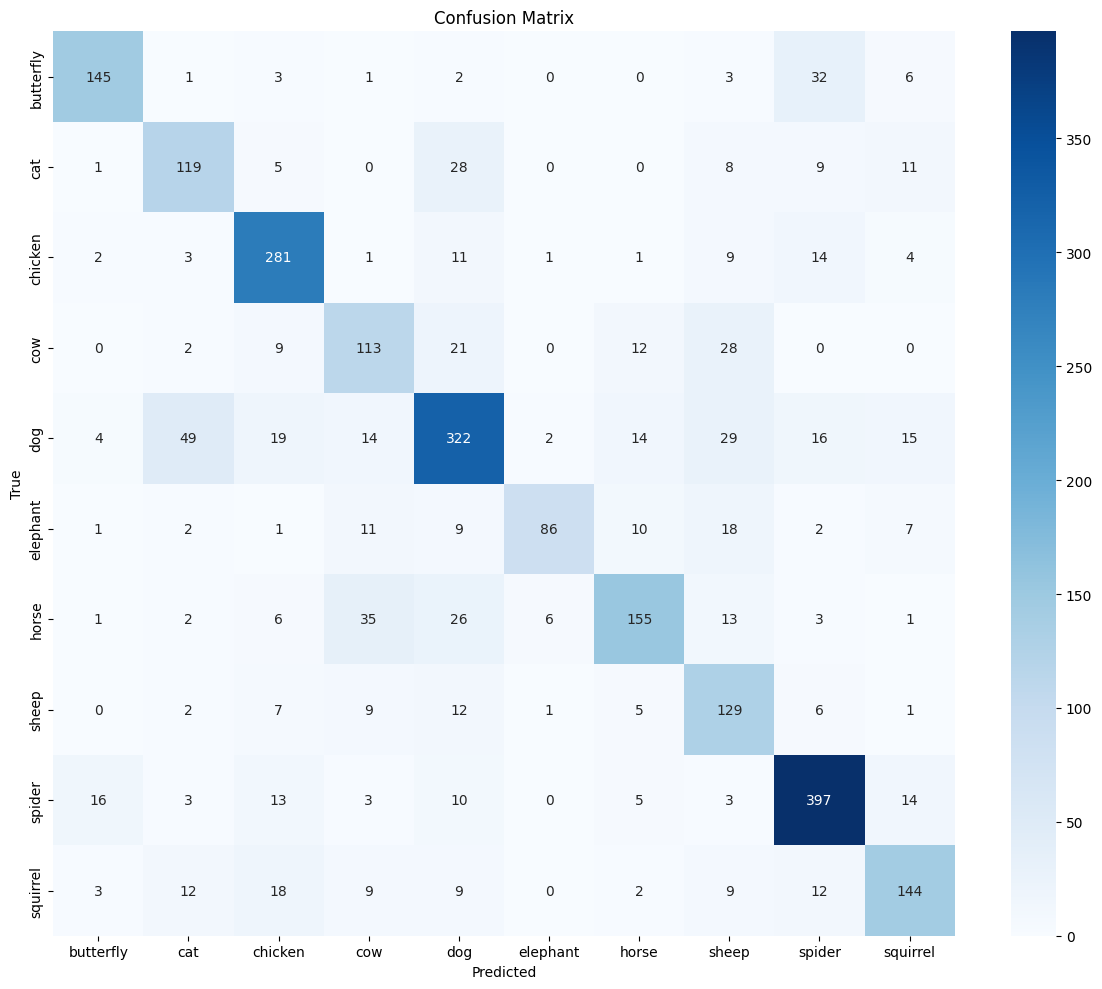


Classification Report:
              precision    recall  f1-score   support

   butterfly       0.84      0.75      0.79       193
         cat       0.61      0.66      0.63       181
     chicken       0.78      0.86      0.82       327
         cow       0.58      0.61      0.59       185
         dog       0.72      0.67      0.69       484
    elephant       0.90      0.59      0.71       147
       horse       0.76      0.62      0.69       248
       sheep       0.52      0.75      0.61       172
      spider       0.81      0.86      0.83       464
    squirrel       0.71      0.66      0.68       218

    accuracy                           0.72      2619
   macro avg       0.72      0.70      0.70      2619
weighted avg       0.73      0.72      0.72      2619

Visualizing model predictions...


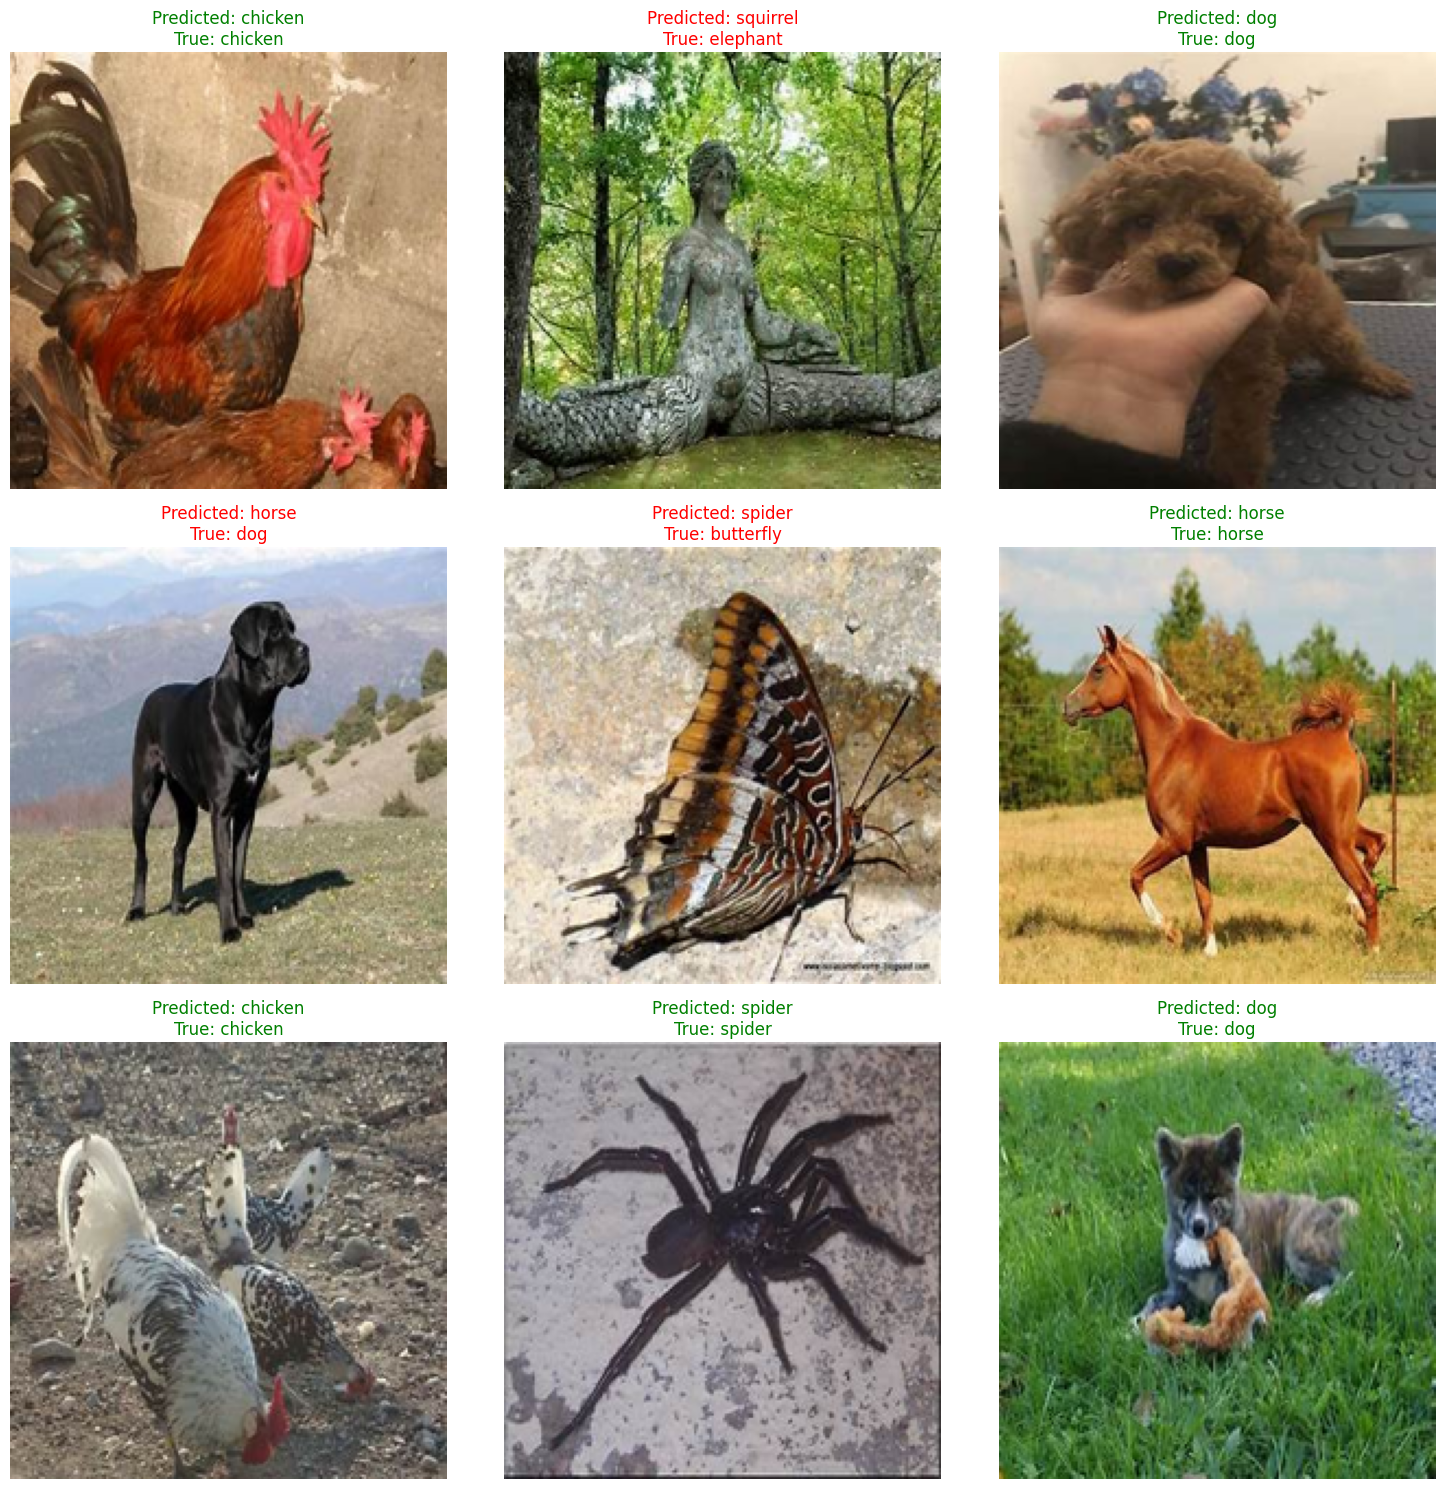

Model saved as 'animal_classifier_centralized.pth'


In [3]:
# CNN Model with improved architecture
class ImprovedAnimalCNN(nn.Module):
    def __init__(self, num_classes):
        super(ImprovedAnimalCNN, self).__init__()
        # First convolutional block
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.25)
        
        # Second convolutional block
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.dropout2 = nn.Dropout(0.25)
        
        # Third convolutional block
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(256)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.dropout3 = nn.Dropout(0.25)
        
        # Calculate the size after convolutions and pooling
        # For 200x200 input: 200 -> 100 -> 50 -> 25
        self.fc1 = nn.Linear(256 * 25 * 25, 512)
        self.bn6 = nn.BatchNorm1d(512)
        self.dropout4 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        # First block
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool1(x)
        x = self.dropout1(x)
        
        # Second block
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool2(x)
        x = self.dropout2(x)
        
        # Third block
        x = F.relu(self.bn5(self.conv5(x)))
        x = self.pool3(x)
        x = self.dropout3(x)
        
        # Flatten
        x = x.view(x.size(0), -1)
        
        # Fully connected layers
        x = F.relu(self.bn6(self.fc1(x)))
        x = self.dropout4(x)
        x = self.fc2(x)
        
        return x

# Training function
def train_model(model, dataloaders, criterion, optimizer, scheduler, device, num_epochs=25):
    since = time.time()
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    # For plotting
    history = {
        'train_loss': [],
        'val_loss': [],
        'train_acc': [],
        'val_acc': []
    }
    use_amp = torch.cuda.is_available()
    if use_amp:
        scaler = torch.amp.GradScaler("cuda")

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
                
            running_loss = 0.0
            running_corrects = 0
            
            # Iterate over data
            for inputs, labels in tqdm(dataloaders[phase], desc=f"{phase} batches"):
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                # Zero the parameter gradients
                optimizer.zero_grad()
                
                # Forward pass
                if phase == 'train':
                    if use_amp:
                        with torch.amp.autocast("cuda"):
                            outputs = model(inputs)
                            _, preds = torch.max(outputs, 1)
                            loss = criterion(outputs, labels)
                            scaler.scale(loss).backward()
                            scaler.step(optimizer)
                            scaler.update()
                    else:
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)
                        loss.backward()
                        optimizer.step()
                else:
                    with torch.no_grad():
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)


                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            if phase == 'val' and scheduler is not None:
                scheduler.step(epoch_loss)
                
            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)
            
            # Store for plotting
            if phase == 'train':
                history['train_loss'].append(epoch_loss)
                history['train_acc'].append(epoch_acc.item())
            else:
                history['val_loss'].append(epoch_loss)
                history['val_acc'].append(epoch_acc.item())
            
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
            
            # Deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        
        print()
    
    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')
    
    # Load best model weights
    model.load_state_dict(best_model_wts)
    
    return model, history

# Function to evaluate model on test set
def evaluate_model(model, test_loader, criterion, device, class_names):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    
    # For confusion matrix
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc="Testing"):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            
            # Statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            
            # For confusion matrix
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    test_loss = running_loss / len(test_loader.dataset)
    test_acc = running_corrects.double() / len(test_loader.dataset)
    
    print(f'Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}')
    
    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    
    # Plot confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')
    plt.show()
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))
    
    return test_loss, test_acc.item(), all_preds, all_labels

# Function to visualize model predictions
def visualize_model_predictions(model, test_loader, class_names, device, num_images=9):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure(figsize=(15, 15))
    
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(3, 3, images_so_far)
                ax.axis('off')
                
                # Set title color based on correct/incorrect prediction
                is_correct = preds[j] == labels[j]
                title_color = 'green' if is_correct else 'red'
                
                ax.set_title(f'Predicted: {class_names[preds[j]]}\nTrue: {class_names[labels[j]]}', 
                             color=title_color)
                
                # Denormalize and convert to numpy for display
                img = inputs.cpu().data[j].permute(1, 2, 0).numpy()
                img = np.clip(img * 0.5 + 0.5, 0, 1)  # Denormalize
                ax.imshow(img)
                
                if images_so_far == num_images:
                    model.train(mode=was_training)
                    plt.tight_layout()
                    plt.savefig('sample_predictions.png')
                    plt.show()
                    return
    
    model.train(mode=was_training)
    plt.tight_layout()
    plt.savefig('sample_predictions.png')
    plt.show()

# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Training Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()

# Main execution
def run_centralized_training():
    # Set random seed for reproducibility
    torch.manual_seed(42)
    np.random.seed(42)
    random.seed(42)
    
    # Check if CUDA is available
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    # Create dataloaders dictionary
    dataloaders = {
        'train': train_loader,
        'val': val_loader
    }
    
    # Create model
    num_classes = len(dataset.class_names)
    model = ImprovedAnimalCNN(num_classes).to(device)
    
    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    
    # Learning rate scheduler
    exp_lr_scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)
    
    # Train model
    print("Starting training...")
    model, history = train_model(
        model, 
        dataloaders, 
        criterion, 
        optimizer, 
        exp_lr_scheduler, 
        device, 
        num_epochs=10
    )
    
    # Plot training history
    plot_training_history(history)
    
    # Evaluate model on test set
    print("Evaluating model on test set...")
    evaluate_model(model, test_loader, criterion, device, dataset.class_names)
    
    # Visualize model predictions
    print("Visualizing model predictions...")
    visualize_model_predictions(model, test_loader, dataset.class_names, device)
    
    # Save the model
    torch.save(model.state_dict(), 'animal_classifier_centralized.pth')
    print("Model saved as 'animal_classifier_centralized.pth'")
    
    return model

# Run the centralized training
centralized_model = run_centralized_training()

In [5]:
# --- Centralized ML Cloud Simulation Cost Calculation ---

# Cloud VM hourly rate (e.g., AWS g4dn.xlarge, April 2025)
CLOUD_HOURLY_RATE = 0.526  # USD/hour

# If you know your dataset size, set it here (in GB)
DATA_SIZE_GB = 0.636  # Example: adjust to your dataset size
STORAGE_RATE = 0.023  # USD/GB/month (typical AWS S3 rate)

# Use the time_elapsed variable from your training
training_time_hours = 20828 / 3600

# Compute cost for training
compute_cost = CLOUD_HOURLY_RATE * training_time_hours

# Storage cost for one month
storage_cost = STORAGE_RATE * DATA_SIZE_GB

# Total cost (training + storage)
total_cost = compute_cost + storage_cost

print(f"--- Centralized ML Cloud Simulation Cost ---")
print(f"Total training time: {training_time_hours:.2f} hours")
print(f"Compute cost (@${CLOUD_HOURLY_RATE}/hr): ${compute_cost:.2f}")
print(f"Storage cost ({DATA_SIZE_GB} GB @${STORAGE_RATE}/GB/month): ${storage_cost:.2f}")
print(f"Total simulation cost: ${total_cost:.2f}")


--- Centralized ML Cloud Simulation Cost ---
Total training time: 5.79 hours
Compute cost (@$0.526/hr): $3.04
Storage cost (0.636 GB @$0.023/GB/month): $0.01
Total simulation cost: $3.06
